In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
sns.set()

In [324]:
#url='https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae'
#df = pd.read_csv(url,error_bad_lines = False)
#url= 'https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+'
#data = pd.read_csv(url,error_bad_lines = False)
#data = pd.read_csv('https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+') 
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
#data = pd.read_csv('C:\\Users\\HP\\Desktop\\Hamoye\\Data_for_UCI_named.csv')

In [325]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [326]:
data.shape

(10000, 14)

In [327]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [328]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [329]:
data.drop(columns = 'stab',inplace = True)

In [330]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [261]:
#from sklearn.preprocessing import LabelEncoder

In [262]:
#encoder = LabelEncoder()
#data['stabf'] = encoder.fit_transform(data['stabf'])

In [331]:
X = data.drop(columns='stabf')
y = data['stabf']

In [332]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [333]:
y_train

2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object

In [212]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [213]:
log_pred = log_reg.predict(x_test)
log_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [214]:
accuracy = accuracy_score(y_test, log_pred)
print('Accuracy: {}'.format(round(accuracy*100), 3)) #prints 53.0

Accuracy: 88.0


In [397]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['stabf'] = encoder.fit_transform(data['stabf'])

In [398]:
#scaling
from sklearn.preprocessing import StandardScaler

In [336]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#y_train_scaled = scaler.fit_transform(y_train).reshape(-1, 1)
x_test_scaled = scaler.transform(x_test)
x_test_scaled.shape

(2000, 12)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state =1)
log_reg.fit(x_train_scaled, y_train)

#Confusion Matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(x_test_scaled)
cnf_mat = confusion_matrix(y_test, new_predictions)
cnf_mat 

#Cross-validation and accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train_scaled, y_train, cv=5, scoring='f1_macro')
scores*100

log_pred = log_reg.predict(x_test_scaled)
log_pred

accuracy = accuracy_score(y_test, log_pred)
print('Accuracy: {}'.format(round(accuracy*100), 3))

In [344]:
from sklearn.ensemble import RandomForestClassifier

In [345]:
RFC = RandomForestClassifier(random_state = 1)
RFC.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=1)

In [346]:
RFC_pred = RFC.predict(x_test_scaled)

In [347]:
RFC_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [348]:
#do for recall and f1 score
from sklearn.metrics import classification_report

In [352]:
print(classification_report(y_test, RFC_pred, digits = 4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [353]:
accuracy = accuracy_score(y_test, RFC_pred)
print('Accuracy: {}'.format(round(accuracy*100), 3)) #prints 53.0

Accuracy: 93.0


In [354]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()
tree.fit(x_train_scaled, y_train)
tree_pred = tree.predict(x_test_scaled)

In [355]:
tree_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [356]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

      stable       0.94      0.86      0.90       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [372]:
accuracy = accuracy_score(y_test, tree_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2)) 

Accuracy: 93.0


In [357]:
n_estimators = [10, 50, 100, 250, 400]
min_samples_split = [2,3,5,7,9]
min_samples_leaf = [1,2,4,6,8]
max_features = ['auto', 'sprt', 'log2']
#max_features = ['sqrt']
hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_split, 'max_features': max_features} 

In [362]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree,hyperparameter_grid, random_state = 1)
search = clf.fit(x_train_scaled, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\HP\Anaconda3\lib\site-packages

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\HP\Anaconda3\lib\site-packages

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\HP\Anaconda3\lib\site-packages

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\HP\Anaconda3\lib\site-packages

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\HP\Anaconda3\lib\site-packages\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\HP\Anaconda3\lib\site-packages

In [399]:
tree_pred = clf.predict(x_test_scaled)
tree_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [400]:
search.best_params_.values()

dict_values([400, 2, 'log2'])

In [401]:
tree_param = ExtraTreesClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2')
tree_param.fit(x_train_scaled, y_train)
tree_param_pred = tree_param.predict(x_test_scaled)

In [402]:
accuracy = accuracy_score(y_test, tree_param_pred)
print('Accuracy: {}'.format(round(accuracy*100), 4)) #prints 53.0

Accuracy: 93.0


In [403]:
print(classification_report(y_test, tree_param_pred))

              precision    recall  f1-score   support

      stable       0.97      0.84      0.90       712
    unstable       0.92      0.99      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.94      0.91      0.93      2000
weighted avg       0.94      0.93      0.93      2000



In [412]:
max(tree_param.feature_importances_)

0.11906170398692989

In [406]:
feature_importance_scaled = tree_param.feature_importances_

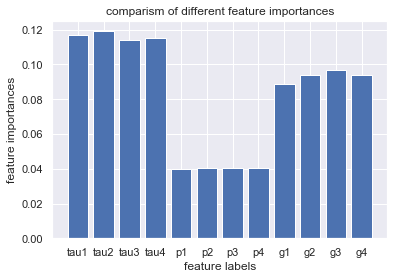

In [409]:
plt.bar(X.columns, feature_importance_scaled)
plt.xlabel('feature labels')
plt.ylabel('feature importances')
plt.title('comparism of different feature importances')
plt.show()

In [373]:
import xgboost

In [374]:
xgboost.__version__

'1.1.1'

In [387]:
#for xgboost using gradient boosting
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
extreme1 = XGBClassifier(max_depth = 3, learning_rate = 0.1)
extreme1.fit(x_train_scaled, y_train)
extreme1_pred = extreme1.predict(x_test_scaled)

In [388]:
extreme1_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [389]:
print(classification_report(y_test, extreme1_pred,digits = 4))

              precision    recall  f1-score   support

      stable     0.9206    0.8469    0.8822       712
    unstable     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [383]:
accuracy = accuracy_score(y_test, extreme1_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2)) #prints 53.0

Accuracy: 92.0


In [321]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [70]:
#for lightgbm using LGBMClassifier
from lightgbm import LGBMClassifier
light = LGBMClassifier()
light.fit(x_train_scaled, y_train)
light_pred = light.predict(x_test_scaled)

In [71]:
light_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)